## Exercise 9 - K-nearest neighbors

- Use the same dataset as in previous exercise (voice.csv)
- Dataset includes male and female voice samples with different features
- In this exercise you will use supervised machine learning method called K-nearest neighbors for the dataset

1 Import all necessary libraries. Then load the dataset and save it to the dataframe.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("data_files/voice.csv", delimiter=",")


2 filter the data so that only the following columns will be selected: **meanfun** and **IQR**. Then split the dataset so that 75 % of the data will be used for training.

In [40]:
X = data[["meanfun","IQR"]]
y = data["label"]
h = .01

le = LabelEncoder()
y_encoded = le.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.25, random_state = 42)



3 Find the optimal value for k comparing possible values and error rate.

In [30]:
#print(len(data))
#optimal_k = int(np.sqrt(len(data)))
#print(optimal_k)

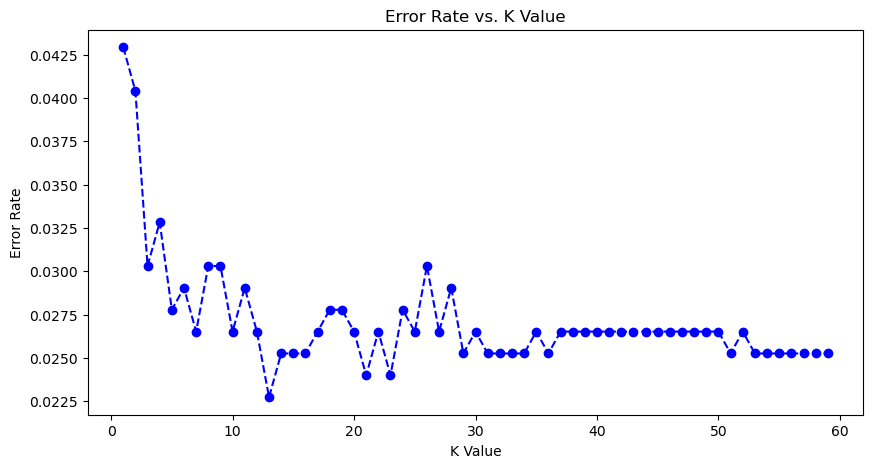

Optimal K value: 13


In [31]:
error_rate = []
for i in range(1,60):
    knn = neighbors.KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 60), error_rate, marker='o', linestyle='dashed', color='b', markersize=6)
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.title("Error Rate vs. K Value")
plt.show()

optimal_k = np.argmin(error_rate) + 1
print(f"Optimal K value: {optimal_k}")

4 Define a function and include the following operations inside the function:
   - Define a classifier
   - Fit the data for the classifier
   - Calculate minimum and maximum values for boundaries for meanfun and IQR
   - Run predictions
   - Draw a chart from predicted data utilising previously defined colormaps

Utilise your function and call it using the optimal k value chosen previously.

c:\Users\jakac\anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


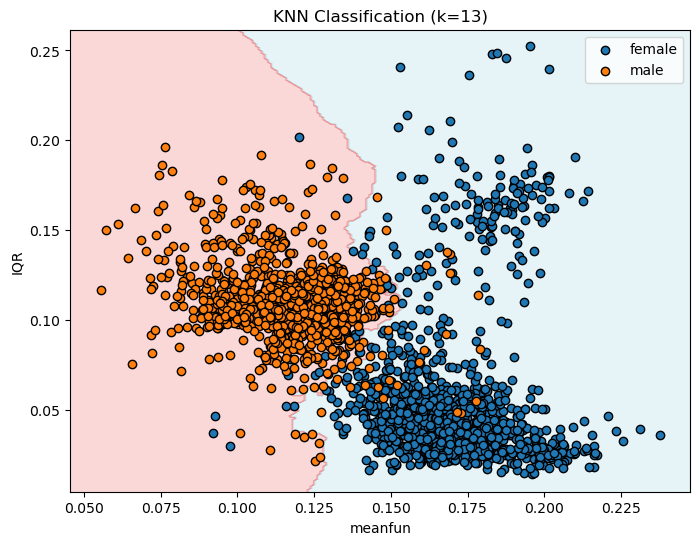

In [42]:
def visualize_knn(k):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    x_min, x_max = X["meanfun"].min() - 0.01, X["meanfun"].max() + 0.01
    y_min, y_max = X["IQR"].min() - 0.01, X["IQR"].max() + 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001),
                         np.arange(y_min, y_max, 0.001))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    cmap_background = ListedColormap(["lightblue", "lightcoral"])
    cmap_points = ["blue", "red"]
    
    plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)
    
    for label in np.unique(y_train):
        plt.scatter(
            x_train[y_train == label]["meanfun"],
            x_train[y_train == label]["IQR"],
            label=le.inverse_transform([label])[0],  # Convert back to original label
            edgecolor="k"
        )
    
    plt.xlabel("meanfun")
    plt.ylabel("IQR")
    plt.title(f"KNN Classification (k={k})")
    plt.legend()
    plt.show()

visualize_knn(optimal_k)